
Estudos sobre empresas Unicórnios
Inspirado no material do Odemir Depieri Jr

https://www.youtube.com/watch?v=06FqGFRd4Ck&list=PLLWTDkRZXQa9YyC1LMbuDTz3XVC4E9ZQA&index=53



In [55]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings # ignorar avisos
warnings.filterwarnings('ignore')

In [56]:
# Lendo os dados
Base_Dados = pd.read_csv('/content/drive/MyDrive/Projetos_OdemirJr/Projeto01 - Unicornios/Startups+in+2021+end.csv')

# Verificando a dimensao
Base_Dados.shape

(936, 8)

In [57]:
# Primerios registros
Base_Dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [58]:
# Verificando as colunas existentes
Base_Dados.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [59]:
# Renomeando as colunas
Base_Dados.rename( columns= {
    'Unnamed: 0' : 'id',
    'Company' : 'Empresa',
    'Valuation ($B)': 'Valor ($b)',
    'Date Joined' : 'Data de Adesao',
    'Country' : 'Pais',
    'City' : 'Cidade',
    'Industry' : 'Setor',
  'Select Investors' : 'Investidores',
}, inplace=True)


In [60]:
# Verificando o tipo de informacao
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor ($b)      936 non-null    object
 3   Data de Adesao  936 non-null    object
 4   Pais            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [61]:
# Verificando quantos campo nulos
Base_Dados.isnull().sum()

id                 0
Empresa            0
Valor ($b)         0
Data de Adesao     0
Pais               0
Cidade            15
Setor              0
Investidores       1
dtype: int64

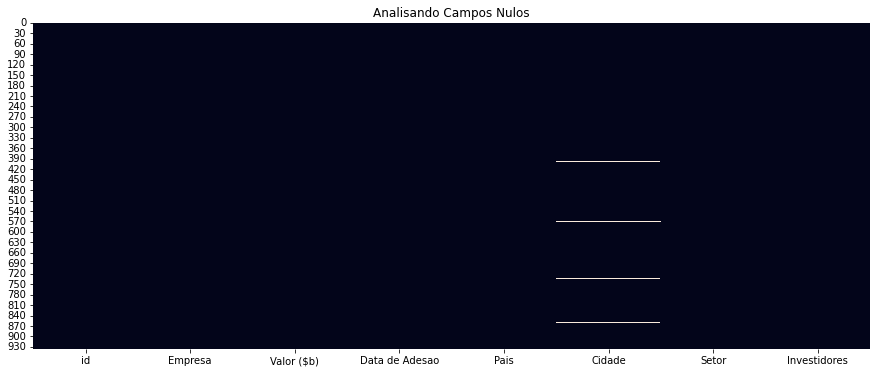

In [62]:
# Campos nulos de forma Grafica
plt.figure( figsize=(15,6) )
plt.title('Analisando Campos Nulos')
sns.heatmap( Base_Dados.isnull(), cbar=False );

In [63]:
# Verificando campos unicos. Bom para comparar se existe repeticao
Base_Dados.nunique()

id                936
Empresa           935
Valor ($b)        192
Data de Adesao    589
Pais               47
Cidade            239
Setor              17
Investidores      920
dtype: int64

In [64]:
# Valores unicos dentro de uma coluna
Base_Dados['Setor'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [65]:
# Total de valores unicos dentro de uma coluna
Base_Dados['Setor'].nunique()

17

In [66]:
# Valores unicos - Ranking
Base_Dados['Setor'].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Setor, dtype: int64

In [67]:
# Valores unicos - Ranking. Em forma de porcentagem
Base_Dados['Setor'].value_counts( normalize = True)

Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: Setor, dtype: float64

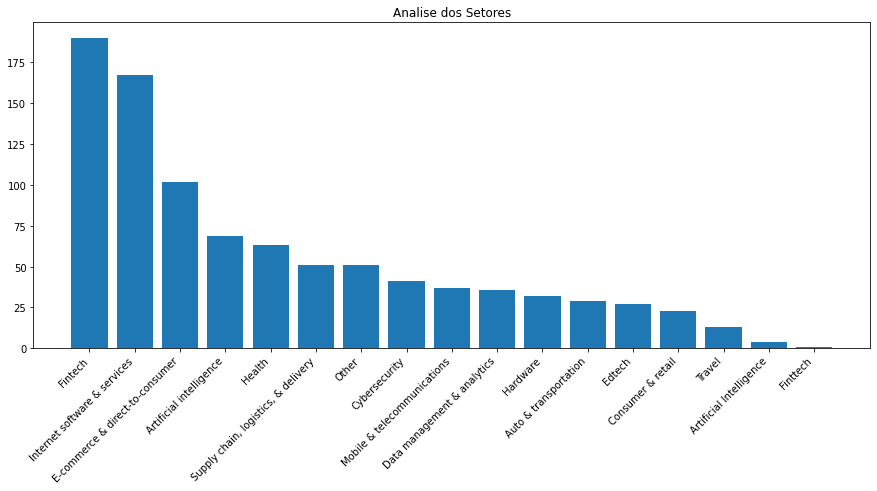

In [68]:
# Grafico
plt.figure( figsize=(15,6) )
plt.title('Analise dos Setores')
plt.bar( Base_Dados['Setor'].value_counts().index, Base_Dados['Setor'].value_counts()  )
plt.xticks( rotation=45, ha='right' );

In [69]:
# Valores unicos de startups de cada Pais. Descobrir os paises que mais geram startups no mundo
Base_Dados['Pais'].value_counts()

United States           477
China                   169
India                    51
United Kingdom           37
Germany                  23
Israel                   21
France                   19
Canada                   15
Brazil                   15
South Korea              11
Singapore                11
Hong Kong                 7
Japan                     6
Australia                 6
Mexico                    5
Netherlands               5
Indonesia                 4
Spain                     4
Sweden                    4
Switzerland               4
Ireland                   3
United Arab Emirates      3
Norway                    3
Belgium                   2
Thailand                  2
Denmark                   2
Philippines               2
Finland                   2
Colombia                  2
South Africa              2
Turkey                    2
Austria                   2
Chile                     1
Malaysia                  1
Czech Republic            1
United States,      

In [70]:
# Percentuais arredondados de valores unicos de startups de cada Pais. Descobrir os paises que mais geram startups no mundo
Analise = round(Base_Dados['Pais'].value_counts( normalize = True) * 100, 1)
Analise

United States           51.0
China                   18.1
India                    5.4
United Kingdom           4.0
Germany                  2.5
Israel                   2.2
France                   2.0
Canada                   1.6
Brazil                   1.6
South Korea              1.2
Singapore                1.2
Hong Kong                0.7
Japan                    0.6
Australia                0.6
Mexico                   0.5
Netherlands              0.5
Indonesia                0.4
Spain                    0.4
Sweden                   0.4
Switzerland              0.4
Ireland                  0.3
United Arab Emirates     0.3
Norway                   0.3
Belgium                  0.2
Thailand                 0.2
Denmark                  0.2
Philippines              0.2
Finland                  0.2
Colombia                 0.2
South Africa             0.2
Turkey                   0.2
Austria                  0.2
Chile                    0.1
Malaysia                 0.1
Czech Republic

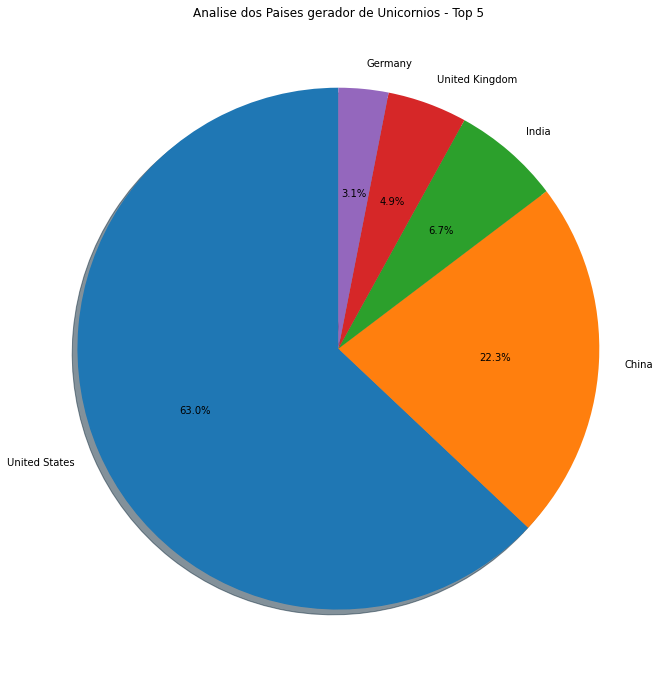

In [71]:
# Plot geral dos Paises
plt.figure( figsize=(30,12) )
plt.title('Analise dos Paises gerador de Unicornios - Top 5')
plt.pie(
    Analise.head(5),
    labels = Analise.index[0:5],
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

In [72]:
# Data está no formato object
Base_Dados['Data de Adesao'].head()

0      4/7/2017
1     12/1/2012
2     1/23/2014
3    12/12/2011
4      1/8/2018
Name: Data de Adesao, dtype: object

In [73]:
# Conversao de datas
Base_Dados['Data de Adesao'] = pd.to_datetime (Base_Dados['Data de Adesao'])
Base_Dados['Data de Adesao'].head()

0   2017-04-07
1   2012-12-01
2   2014-01-23
3   2011-12-12
4   2018-01-08
Name: Data de Adesao, dtype: datetime64[ns]

In [76]:
# Extraindo ano e mes, colocando em novas colunas
Base_Dados['Mes'] = pd.DatetimeIndex( Base_Dados['Data de Adesao'] ).month
Base_Dados['Ano'] = pd.DatetimeIndex( Base_Dados['Data de Adesao'] ).year

Base_Dados.head(10)

,id,Empresa,Valor ($b),Data de Adesao,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018
5,5,Instacart,$39,2014-12-30,United States,San Francisco,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By...",12,2014
6,6,Databricks,$38,2019-02-05,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates...",2,2019
7,7,Revolut,$33,2018-04-26,United Kingdom,London,Fintech,"index Ventures, DST Global, Ribbit Capital",4,2018
8,8,Nubank,$30,2018-03-01,Brazil,Sao Paulo,Fintech,"Sequoia Capital, Redpoint e.ventures, Kaszek V...",3,2018
9,9,Epic Games,$28.7,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",10,2018


In [77]:
# Verificando as Informacoes
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              936 non-null    int64         
 1   Empresa         936 non-null    object        
 2   Valor ($b)      936 non-null    object        
 3   Data de Adesao  936 non-null    datetime64[ns]
 4   Pais            936 non-null    object        
 5   Cidade          921 non-null    object        
 6   Setor           936 non-null    object        
 7   Investidores    935 non-null    object        
 8   Mes             936 non-null    int64         
 9   Ano             936 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 73.2+ KB


In [90]:
# Agrupando pelo id
Base_Dados.groupby( by=['Pais', 'Ano', 'Mes', 'Empresa'] ).count()['id'].head(20)

Pais       Ano   Mes  Empresa         
Argentina  2021  8    Uala                1
Australia  2018  1    Canva               1
           2019  3    Airwallex           1
           2021  5    SafetyCulture       1
                 7    Culture Amp         1
                      GO1                 1
                 12   Pet Circle          1
Austria    2021  3    BitPanda            1
                 6    GoStudent           1
Belgium    2019  1    Collibra            1
           2021  7    Odoo                1
Bermuda    2017  4    Afiniti             1
Brazil     2018  3    Nubank              1
                 7    Movile              1
                 11   iFood               1
           2019  6    Loggi               1
                 9    QuintoAndar         1
                 10   EBANX               1
                 12   Wildlife Studios    1
           2020  1    Loft                1
Name: id, dtype: int64

In [91]:
# Tabela Analitica, contando pelo id
Analise_Agrupada = Base_Dados.groupby( by=['Pais', 'Ano', 'Mes', 'Empresa'] ).count()['id'].reset_index()
Analise_Agrupada.head(20)

,Pais,Ano,Mes,Empresa,id
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
5,Australia,2021,7,GO1,1
6,Australia,2021,12,Pet Circle,1
7,Austria,2021,3,BitPanda,1
8,Austria,2021,6,GoStudent,1
9,Belgium,2019,1,Collibra,1


In [92]:
# Localizando o Brasil
Analise_Agrupada_Brasil = Analise_Agrupada.loc[
    Analise_Agrupada['Pais'] == 'Brazil'
]

Analise_Agrupada_Brasil

,Pais,Ano,Mes,Empresa,id
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1


In [93]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              936 non-null    int64         
 1   Empresa         936 non-null    object        
 2   Valor ($b)      936 non-null    object        
 3   Data de Adesao  936 non-null    datetime64[ns]
 4   Pais            936 non-null    object        
 5   Cidade          921 non-null    object        
 6   Setor           936 non-null    object        
 7   Investidores    935 non-null    object        
 8   Mes             936 non-null    int64         
 9   Ano             936 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 73.2+ KB


In [100]:
Base_Dados.head()

,id,Empresa,Valor ($b),Data de Adesao,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [105]:
# Transformando a coluna valor
# Removendo o ($) dos registros das colunas
# Apply executa alteração, percorrendo linha-por-linha
# pd.to_numeric para colocar o tipo numerico, ele esta object

Base_Dados['Valor ($b)'] = pd.to_numeric(Base_Dados['Valor ($b)'].apply( lambda Linha: Linha.replace('$', '')))

Base_Dados.head(10)

,id,Empresa,Valor ($b),Data de Adesao,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018
5,5,Instacart,39.0,2014-12-30,United States,San Francisco,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By...",12,2014
6,6,Databricks,38.0,2019-02-05,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates...",2,2019
7,7,Revolut,33.0,2018-04-26,United Kingdom,London,Fintech,"index Ventures, DST Global, Ribbit Capital",4,2018
8,8,Nubank,30.0,2018-03-01,Brazil,Sao Paulo,Fintech,"Sequoia Capital, Redpoint e.ventures, Kaszek V...",3,2018
9,9,Epic Games,28.7,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",10,2018


In [109]:
# Agrupando por Pais
Analise_Pais = Base_Dados.groupby( by=['Pais'] ).sum()['Valor ($b)'].reset_index()
Analise_Pais.head(15)

,Pais,Valor ($b)
0,Argentina,2.45
1,Australia,50.60
2,Austria,5.81
3,Belgium,7.55
4,Bermuda,1.60
5,Brazil,61.05
6,Canada,37.73
7,Chile,1.50
8,China,569.48
9,Colombia,6.40


In [114]:
# Ordenando de forma crescente. Paises que mais tem valores em startups
Analise_Valor = Analise_Pais.sort_values('Valor ($b)', ascending=False).head(10)


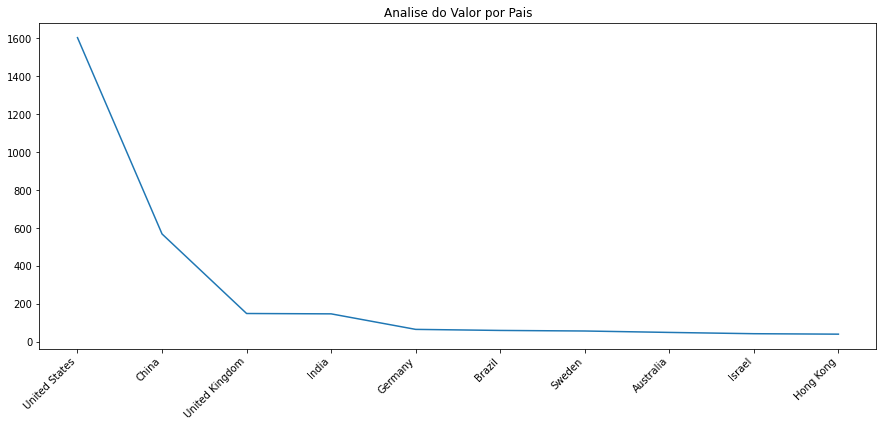

In [115]:
# Grafico
plt.figure( figsize=(15,6) )
plt.plot( Analise_Valor['Pais'], Analise_Valor['Valor ($b)'] )
plt.title('Analise do Valor por Pais')
plt.xticks( rotation=45, ha='right');